In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import mca
from mpl_toolkits.mplot3d import Axes3D

In [9]:
data = pd.read_csv("SKIN_AFDM.csv", sep=";")

In [10]:
data.head(10)

,Age_BIN,Ville,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,...,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,L,Europe,71541,"1,8669","5,6292","103,5","12,5397","8,9513","5,4579","14,4782",...,"44,7492","75,1704","7,1162","2,563","5,9539",203,"15,1434","9,3552","424069,5","446,5085"
1,L,Europe,"89193,5","4,2191","5,9259","96,5","11,733","11,8962","4,2646","18,2627",...,"0,555","61,741","6,6843","10,8779","6,8301",210,"16,9882","14,9127",493232,"496,9325"
2,H,Europe,"44993,5","2,1424","5,3528",100,"9,0888","7,7184","4,0401","12,1515",...,"42,4604","72,953","7,6134","5,0513","6,2248",163,"13,676","11,7784",380649,"427,0025"
3,L,Europe,"37159,5","3,31","5,9635",112,"12,3705","14,4397","3,8183","15,1668",...,"37,2925","73,6508","7,8988","7,6544","6,5372",215,"18,0385","9,254",442697,"459,019"
4,H,Europe,"182202,5","3,809","6,0859","104,5","12,0235","10,8535","5,8068","9,9939",...,"27,0483","69,4875","8,9338","6,8041","6,5861","203,5","16,2301","10,6475",396187,"433,78"
5,H,Europe,160594,"4,3365","6,1088",123,"12,7729","8,4673","6,0974","13,0221",...,"26,9634","71,637","9,7175","7,0771","6,714","210,5","22,6421","11,7875",357413,"381,5225"
6,L,Europe,"110340,5","4,4475","6,1452","101,5","13,156","9,5961","5,237","11,1757",...,"19,6744","65,8439","7,3916","9,5639","6,6305",210,"15,5479","18,9903","333395,5","339,0295"
7,H,Europe,169398,"7,4284","6,6776",136,"17,1078","9,961","6,8702","11,8548",...,"-1,054","63,1299","7,4489","12,3547","6,9087",191,"16,581","15,9247","317945,5","349,007"
8,H,Europe,100751,"3,5541","5,8262",130,"10,1139","10,3566","5,611","5,4555",...,"29,5105","70,693","9,6554","7,1022","6,7135",224,"19,7758","8,9257","396932,5","427,1035"
9,L,Europe,"123246,5","2,8878","5,9381",92,"11,9184","9,6583","4,8827","11,1586",...,"5,5208","62,7406","7,4134","5,6365","6,4656",182,"16,5576","12,8021",259592,"299,735"


In [11]:
cols_cat = ["Age_BIN", "Ville"]
for col in data.columns:
    if col not in cols_cat:
        data[col] = pd.to_numeric(data[col].str.replace(",", "."), errors="coerce")

In [12]:
data.dtypes

Age_BIN                      object
Ville                        object
Cerne_Surface               float64
Cerne_Haralick_Contraste    float64
Cerne_Haralick_Entropie     float64
Cerne_Rugosite_Rt           float64
Cerne_Rugosite_Ra           float64
Cerne_Orientation_Aniso     float64
Cerne_H76                   float64
Cerne_Contraste_dL          float64
Cerne_Contraste_da          float64
Cerne_Contraste_db          float64
Cerne_Contraste_dC          float64
Cerne_Contraste_dh          float64
Cerne_Contraste_dITA        float64
Cerne_Contraste_dIWA        float64
Cerne_Peau_L                float64
Cerne_Peau_a                float64
Cerne_Peau_b                float64
Cerne_Peau_c                float64
Cerne_Peau_h                float64
Cerne_Peau_ITA              float64
Cerne_Peau_IWA              float64
Cerne_L                     float64
Cerne_a                     float64
Cerne_b                     float64
Cerne_c                     float64
Cerne_h                     

In [13]:
data_num = data.select_dtypes(include=["float64"])
data_cat = data[cols_cat]

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [15]:
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data_num)

In [16]:
def plot_pca_variance(data_scaled):
    pca = PCA()
    pca.fit(data_scaled)
    plt.figure(figsize=(10,6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) +1), pca.explained_variance_ratio_, marker="o")
    plt.title("Variance expliquée par les composantes")
    plt.xlabel("Nombre de composantes principales")
    plt.ylabel("Cumul de la variance expliquée")
    plt.show()

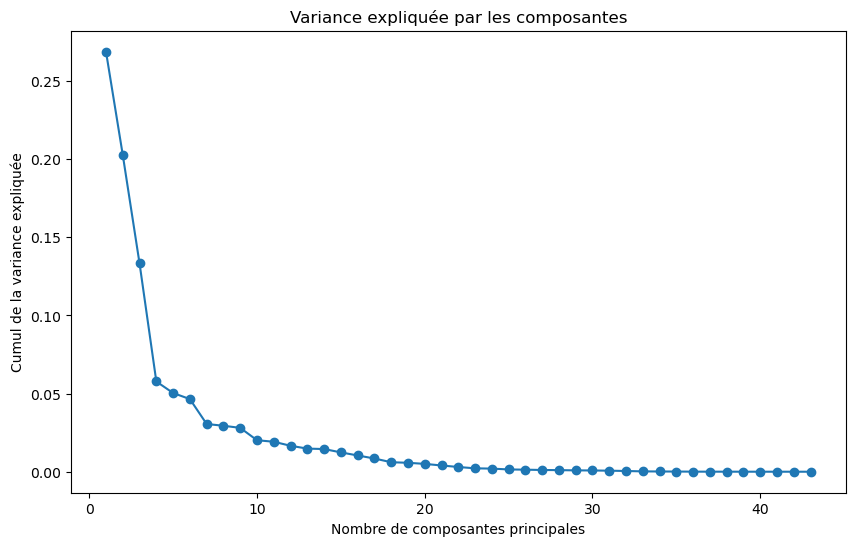

In [17]:
plot_pca_variance(data_scaled)

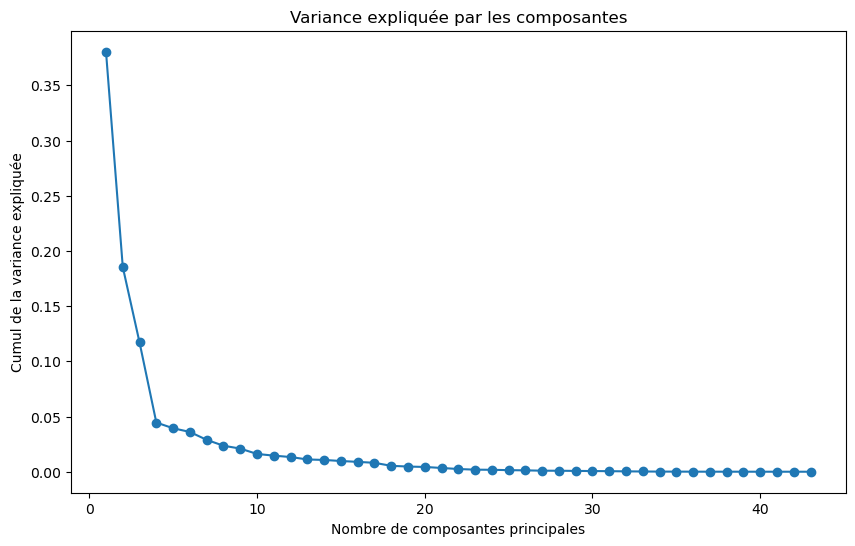

In [18]:
plot_pca_variance(data_robust_scaled)

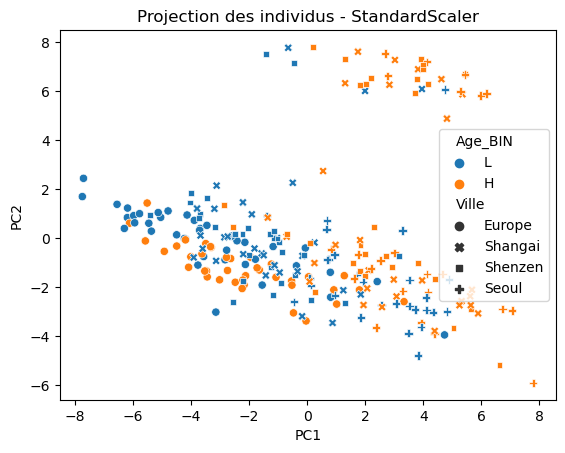

In [19]:
pca = PCA(n_components=4)  # Remplacez par le nombre choisi
data_pca = pca.fit_transform(data_scaled)

# Ajout des variables catégorielles pour l'étiquetage
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca_df = pd.concat([data_pca_df, data_cat.reset_index(drop=True)], axis=1)

# Visualisation
sns.scatterplot(x='PC1', y='PC2', hue='Age_BIN', style='Ville', data=data_pca_df)
plt.title("Projection des individus - StandardScaler")
plt.show()

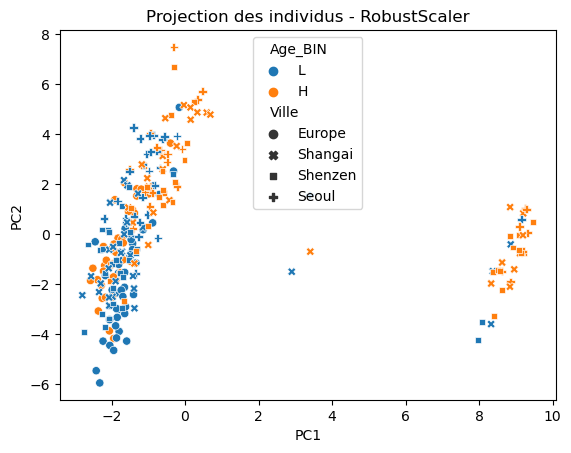

In [20]:
pca = PCA(n_components=3)  # Remplacez par le nombre choisi
data_pca = pca.fit_transform(data_robust_scaled)

# Ajout des variables catégorielles pour l'étiquetage
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])
data_pca_df = pd.concat([data_pca_df, data_cat.reset_index(drop=True)], axis=1)

# Visualisation
sns.scatterplot(x='PC1', y='PC2', hue='Age_BIN', style='Ville', data=data_pca_df)
plt.title("Projection des individus - RobustScaler")
plt.show()

In [21]:
print(data.iloc[248])

Age_BIN                            H
Ville                        Shangai
Cerne_Surface                    0.0
Cerne_Haralick_Contraste      4.8244
Cerne_Haralick_Entropie       5.8134
Cerne_Rugosite_Rt              127.0
Cerne_Rugosite_Ra             8.0854
Cerne_Orientation_Aniso       9.0966
Cerne_H76                        0.0
Cerne_Contraste_dL               0.0
Cerne_Contraste_da               0.0
Cerne_Contraste_db               0.0
Cerne_Contraste_dC               0.0
Cerne_Contraste_dh               0.0
Cerne_Contraste_dITA          2.2498
Cerne_Contraste_dIWA             0.0
Cerne_Peau_L                 60.7307
Cerne_Peau_a                  24.462
Cerne_Peau_b                 24.0717
Cerne_Peau_c                 34.3789
Cerne_Peau_h                 44.5957
Cerne_Peau_ITA               24.1727
Cerne_Peau_IWA               60.4549
Cerne_L                          0.0
Cerne_a                          0.0
Cerne_b                          0.0
Cerne_c                          0.0
C

In [22]:
cols_cerne = ["Cerne_L", "Cerne_a", "Cerne_b", "Cerne_c", "Cerne_h", "Cerne_ITA", "Cerne_IWA", "Cerne_Surface"]
data["presence_cerne"] = data[cols_cerne].eq(0).all(axis=1)

data["presence_cerne"] = data["presence_cerne"].apply(lambda x: "absence" if x else "présence")

In [23]:
data = pd.get_dummies(data, drop_first=True)

In [24]:
acm = mca.MCA(data)

In [25]:
individus_coords_acm = acm.fs_r(N=1)

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca.fit(data_scaled)

individus_coords_acp = pca.transform(data_scaled)

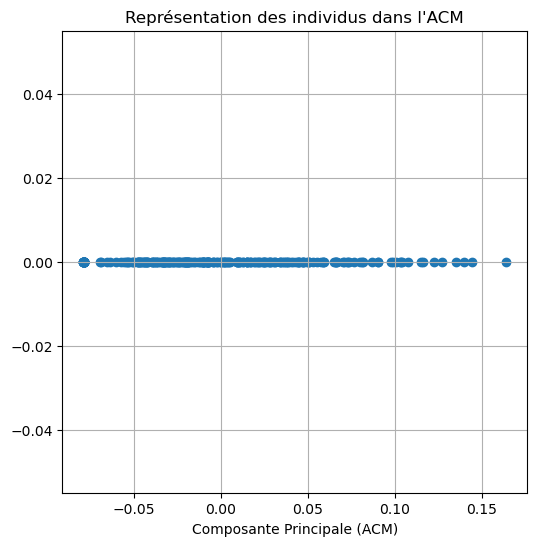

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(individus_coords_acm, [0] * len(individus_coords_acm))
plt.xlabel("Composante Principale (ACM)")
plt.title("Représentation des individus dans l'ACM")
plt.grid(True)
plt.show()